## Part 1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors
sns.set()
%matplotlib inline

## Part 2: Importing the Dataset

In [2]:
dataset = pd.read_csv("./../data/July19_myspeed.csv")
dataset.head()

,Service_provider,technology,Download_Upload,Data_Speed.Kbps.,signal_strength,Service_Area
0,JIO,4G,download,44259,-69.0,NaN
1,JIO,4G,upload,3424,-69.0,NaN
2,VODAFONE,4G,download,30759,NaN,Kerala
3,VODAFONE,4G,download,29738,NaN,Kerala
4,VODAFONE,4G,upload,1688,NaN,Kerala


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643126 entries, 0 to 643125
Data columns (total 6 columns):
Service_provider    643126 non-null object
technology          643126 non-null object
Download_Upload     643126 non-null object
Data_Speed.Kbps.    643126 non-null int64
signal_strength     571283 non-null float64
Service_Area        631951 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 29.4+ MB


In [4]:
dataset.describe()

,Data_Speed.Kbps.,signal_strength
count,643126.000000,571283.000000
mean,9840.368478,-88.829934
std,16859.639752,15.405002
min,0.000000,-112.000000
25%,843.000000,-102.000000
50%,3165.000000,-92.000000
75%,8806.000000,-77.000000
max,141235.000000,-50.000000


## Part3: Data Cleaning

### Handling Missing Values

<h6>Displaying total and percent of NaN values in the complete dataset</h6>

In [5]:
# Counting the total number of missing values for each column
total = dataset.isna().sum().sort_values(ascending=False)

# Calculating the missing value percent for each column
percent = (dataset.isna().sum()/dataset.isna().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent*100], axis=1, keys=['Total_NaN', 'Percent_NaN'])

print(missing_data)

                  Total_NaN  Percent_NaN
signal_strength       71843    11.170906
Service_Area          11175     1.737607
Data_Speed.Kbps.          0     0.000000
Download_Upload           0     0.000000
technology                0     0.000000
Service_provider          0     0.000000


***Plotting the graph for missing Data***

Text(0.5, 1.0, 'Percent missing data by feature')

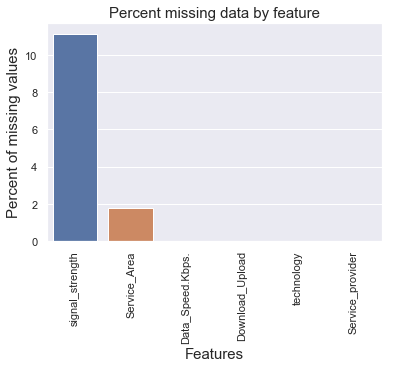

In [6]:
#rotating x labels for better visualisation
plt.xticks(rotation='90')

#plotting the bargraph between percentage missing values and attributes
sns.barplot(x=missing_data.index, y=missing_data['Percent_NaN'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

<h6>Calculating median of the signal strength values of two groups as follows:</h6>
<ol>
    <li>Median of all signal strength data points having same <strong>Download/Upload type, Service provider and technology</strong></li>
    <li>Median of all signal strength data points having same <strong>Service Area, Download/Upload type, Service provider and technology</strong></li>
</ol>
<p><strong style="color: red;">Note: </strong>We are calculating median and not mean due to possible outliers</p>

In [7]:
# Finding median of signal strength points having same Download/Upload type, Service provider and technology
signal_distr_overall = dataset.groupby(['Download_Upload', 'Service_provider', 'technology'], as_index = False)['signal_strength'].median()

# Finding median of signal strength points having same Service Area, Download/Upload type, Service provider and technology
signal_distr_area_wise = dataset.groupby(['Download_Upload', 'Service_provider', 'technology', 'Service_Area'], as_index = False)['signal_strength'].median()

print(signal_distr_area_wise.head())
print(signal_distr_overall.head())

signal_distr_overall['signal_strength'] = signal_distr_overall['signal_strength']*-1 
signal_distr_area_wise['signal_strength'] = signal_distr_area_wise['signal_strength']*-1 

  Download_Upload Service_provider technology    Service_Area  signal_strength
0        download           AIRTEL         3G  Andhra Pradesh            -79.0
1        download           AIRTEL         3G           Assam            -85.0
2        download           AIRTEL         3G           Bihar            -91.0
3        download           AIRTEL         3G         Chennai            -85.0
4        download           AIRTEL         3G           Delhi            -77.0
  Download_Upload Service_provider technology  signal_strength
0        download           AIRTEL         3G            -85.0
1        download           AIRTEL         4G            -97.0
2        download          CELLONE         3G            -81.0
3        download          CELLONE         4G            -91.0
4        download          DOLPHIN         3G            -89.0


<ol>
    <li><h6>Comparing the distribution of signal strength of all the service providers over all areas using bar plot</h6></li>
    <li><h6>Comparing the distribution of signal strength over each service area for each service provider using bar plot</h6></li>
</ol>

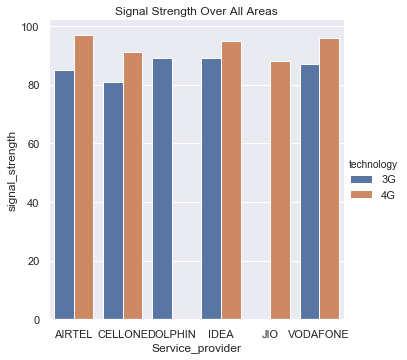

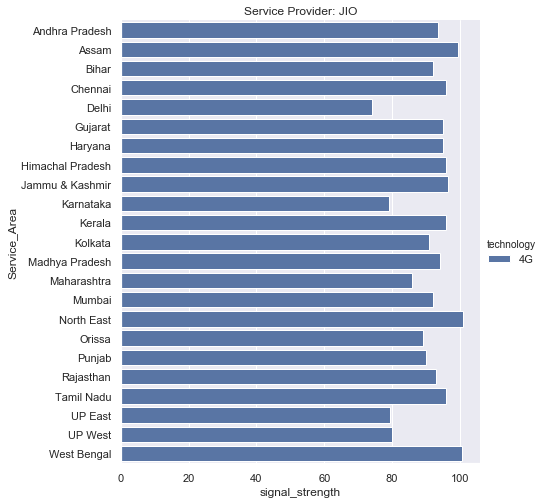

<Figure size 1440x720 with 0 Axes>

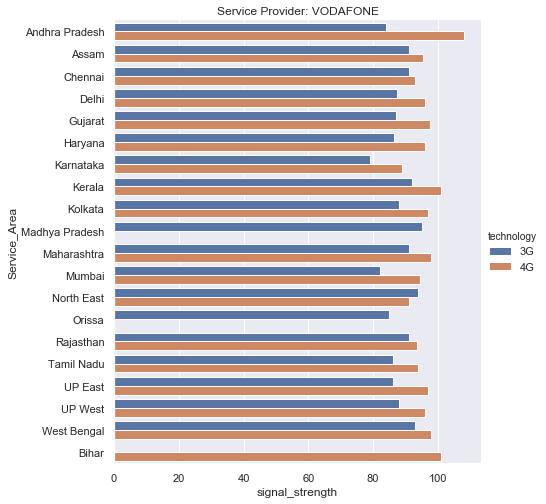

<Figure size 1440x720 with 0 Axes>

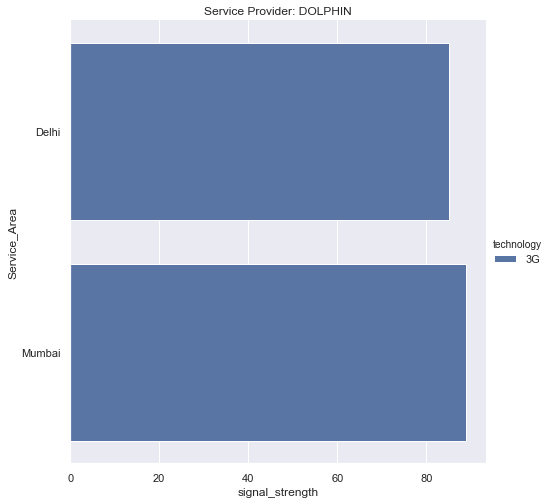

<Figure size 1440x720 with 0 Axes>

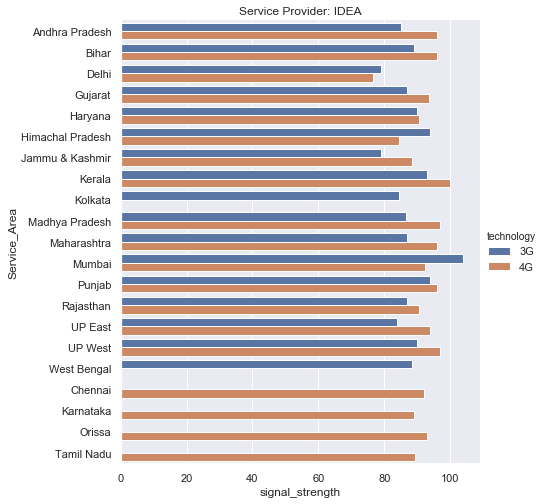

<Figure size 1440x720 with 0 Axes>

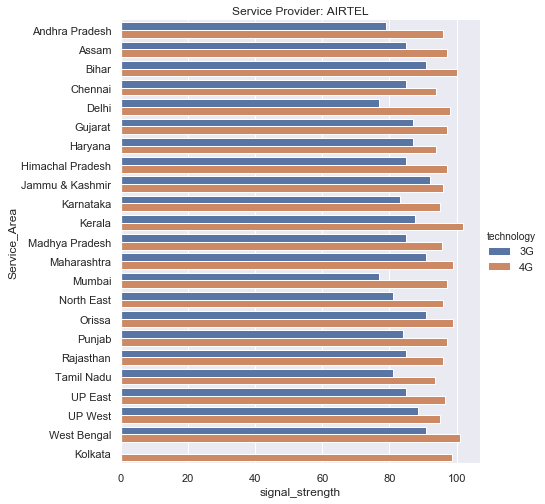

<Figure size 1440x720 with 0 Axes>

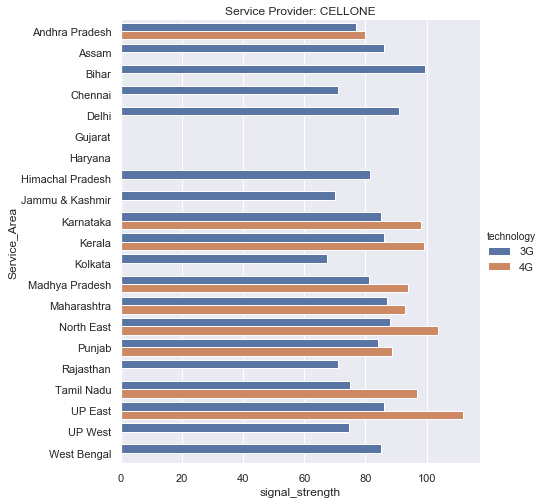

<Figure size 1440x720 with 0 Axes>

In [8]:
# Creating a bar plot for signal strength distribution over all areas
sns.catplot(x='Service_provider', y='signal_strength', hue='technology', data=signal_distr_overall, kind='bar', ci=None)
plt.title('Signal Strength Over All Areas')

# Creating individual bar plots for each service provider over all areas
for provider in set(signal_distr_area_wise['Service_provider']):
    sns.catplot(x='signal_strength', y='Service_Area',  hue='technology', data=signal_distr_area_wise.loc[
            signal_distr_area_wise['Service_provider'] == provider], 
            kind='bar', ci=None, orient='h', height = 7)
    plt.title("Service Provider: " + provider)
    plt.figure(figsize = (20, 10))



<h5>Dropping the rows having no entry for Service Area because the fraction is just 1.74%</h5>

In [9]:
# Dropping data points having NaN values in Service Area column
dataset.dropna(subset = ['Service_Area'], inplace=True)

# Showing the remaining missing values
total_missing = dataset.isna().sum().sort_values(ascending = False)
percent_missing = (total_missing/dataset.isna().count()*100).sort_values(ascending = False)
missing_data = pd.concat([total_missing, percent_missing], axis = 1, keys = ['Total NaNs', 'Percent NaNs'], sort = False)
print(missing_data)

                  Total NaNs  Percent NaNs
signal_strength        70724     11.191374
Service_Area               0      0.000000
Data_Speed.Kbps.           0      0.000000
Download_Upload            0      0.000000
technology                 0      0.000000
Service_provider           0      0.000000


***Doing Box Plot visualistion for outliers***


Text(0.5, 1.0, 'Variation of Signal strength for each Service provider')

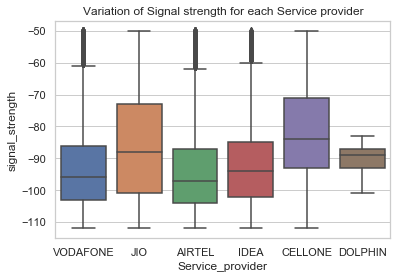

In [10]:
sns.set_style("whitegrid") 
sns.boxplot(x = 'Service_provider', y = 'signal_strength', data = dataset)
plt.title('Variation of Signal strength for each Service provider')

<h4>Filling the missing values in signal strength column</h4>
We have created a <strong>4-dimensional dictionary</strong> that stores median of the signal strength over the data points having same download/upload type, service provider, technology and service area.<br>
The 4 indices of the dictionary are the above 4 features.

In [11]:
from collections import defaultdict

# The nested_dict function will help to create an n-dimensional dictionary
def nested_dict(n, type):
    if n == 1:
        return defaultdict(type)
    else:
        return defaultdict(lambda: nested_dict(n-1, type))

# Storing the median values in the dictionary
signal_dict = nested_dict(4, float)

for index, row in signal_distr_area_wise.iterrows():
    signal_dict[row['Download_Upload']][row['Service_provider']][row['technology']][row['Service_Area']] = float(row['signal_strength'])



In [12]:
null_data = dataset[dataset.isnull().any(axis=1)]
length = len(null_data)
itr = 1

# Filling the missing values in the signal strength column
for index, row in null_data.iterrows():
    if(itr*100 % length == 0):
        print('\r'+str((itr/length)*100.00)[:4]+"% Completed", end="", flush=True)
    if(pd.isna(row['signal_strength'])):
        appropriate_median = signal_dict[row['Download_Upload']][row['Service_provider']][row['technology']][row['Service_Area']]
        
        if(pd.isna(appropriate_median) == False and appropriate_median != 0):
            dataset.at[index, 'signal_strength'] =  -appropriate_median
    itr += 1

100.% Completed

In [13]:
# Showing remaining missing values
total_missing = dataset.isna().sum().sort_values(ascending = False)
percent_missing = (total_missing/dataset.isna().count()*100).sort_values(ascending = False)
missing_data = pd.concat([total_missing, percent_missing], axis = 1, keys = ['Total NaNs', 'Percent NaNs'], sort = False)
print(missing_data)

                  Total NaNs  Percent NaNs
signal_strength           31      0.004905
Service_Area               0      0.000000
Data_Speed.Kbps.           0      0.000000
Download_Upload            0      0.000000
technology                 0      0.000000
Service_provider           0      0.000000


<h5>The Signal Strength column still has very few missing values. The reason is that while calculating median over 4 features, data for all the points having same 4 features was not present</h5>
<h5>Due to very small percent of missing value, we will drop the rows having those missing values.</h5>

In [14]:
# Dropping the missing values from the signal strength column
dataset.dropna(subset = ['signal_strength'], inplace=True)
total_missing = dataset.isna().sum().sort_values(ascending = False)
percent_missing = (total_missing/dataset.isna().count()*100).sort_values(ascending = False)
missing_data = pd.concat([total_missing, percent_missing], axis = 1, keys = ['Total NaNs', 'Percent NaNs'], sort = False)
print(missing_data)

                  Total NaNs  Percent NaNs
Service_Area               0           0.0
signal_strength            0           0.0
Data_Speed.Kbps.           0           0.0
Download_Upload            0           0.0
technology                 0           0.0
Service_provider           0           0.0


### Outlier Removal

***We have used the Box plot on the  Data_Speed_Kbps attribute to visualize and study outliers. Outlier Removal is done separately for upload and download data points.We calculated the threshold for both of them using the formula q75 + (k x IQR) where k is optimized to remove 1% of their respective data points.***

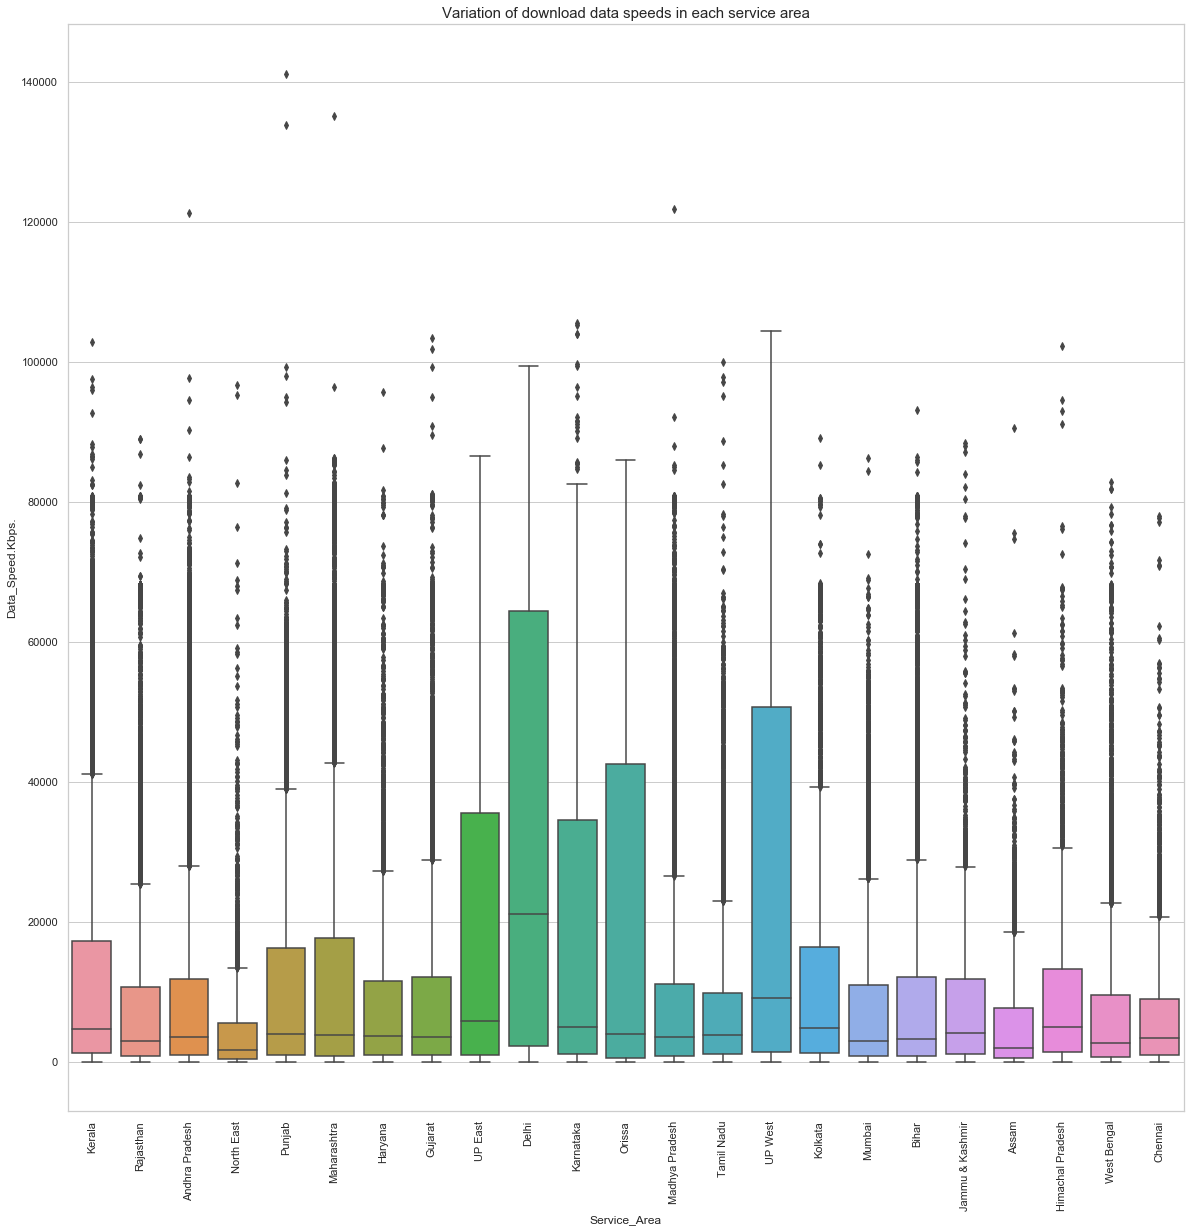

In [15]:
#download speed data
download_data=dataset[dataset['Download_Upload']=='download']
plt.figure(figsize=(20, 20))
plt.xticks(rotation="90")
sns.boxplot(x="Service_Area", y="Data_Speed.Kbps.", data=download_data)
plt.title('Variation of download data speeds in each service area',fontsize=15)
plt.show()

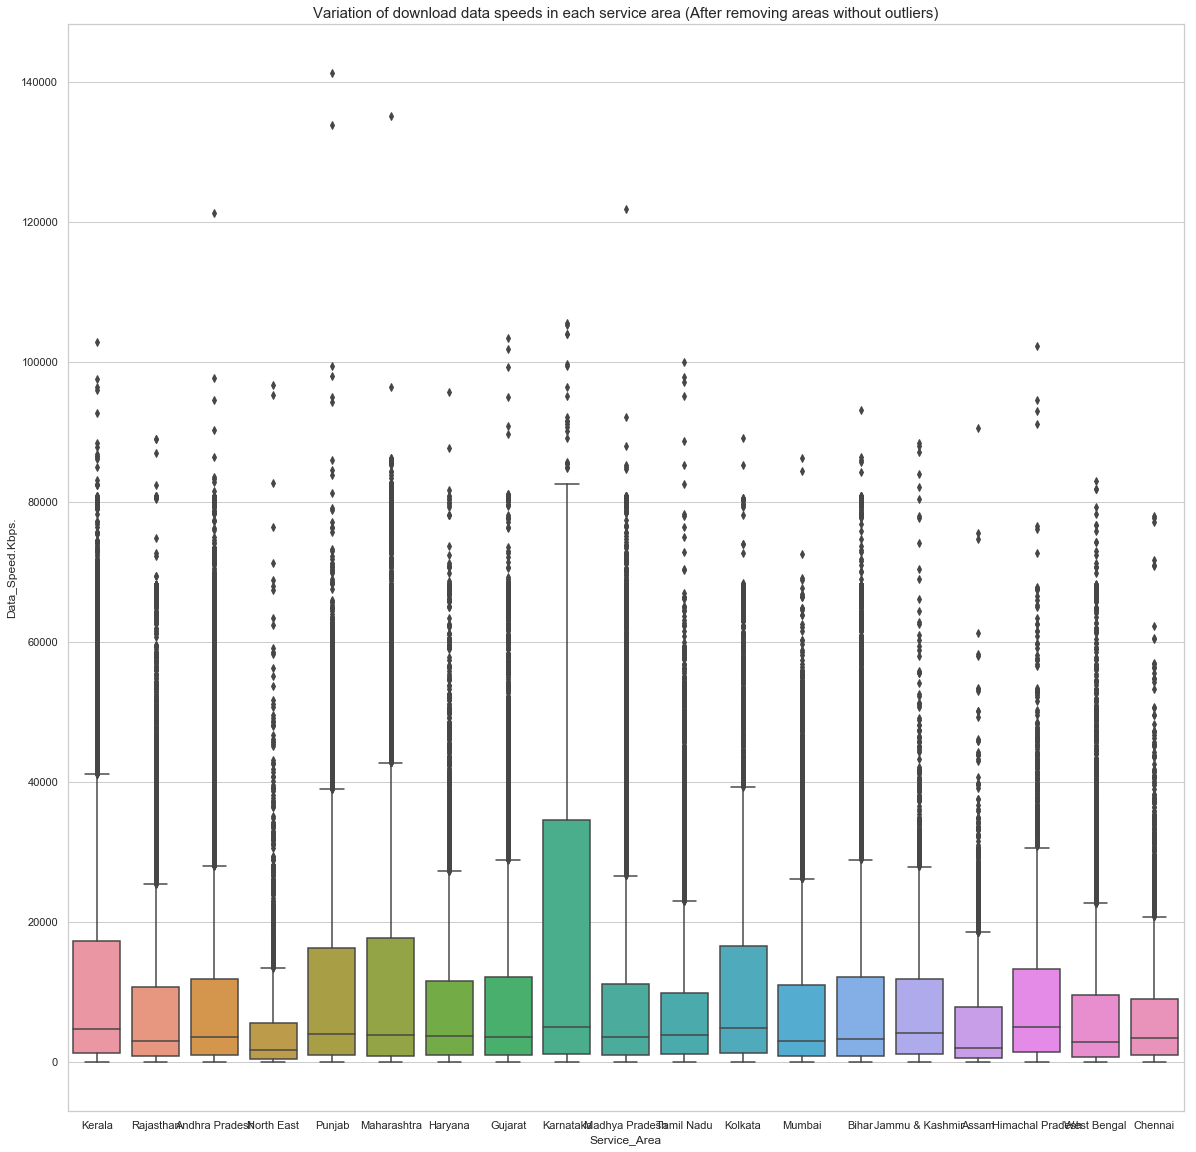

In [16]:
#removing states without outliers
arr = ['UP East','UP West','Delhi','Orissa']
for i in range(0,len(arr)):
    query='Service_Area !=' + "'"+arr[i]+"'" 
    download_data=download_data.query(query) 
#Plotting the box plot for Service area Vs data speed to visualise the outliers for download
plt.figure(figsize=(20, 20))    
sns.boxplot(x="Service_Area", y="Data_Speed.Kbps.", data=download_data)
plt.title('Variation of download data speeds in each service area (After removing areas without outliers)',fontsize=15)
plt.show()

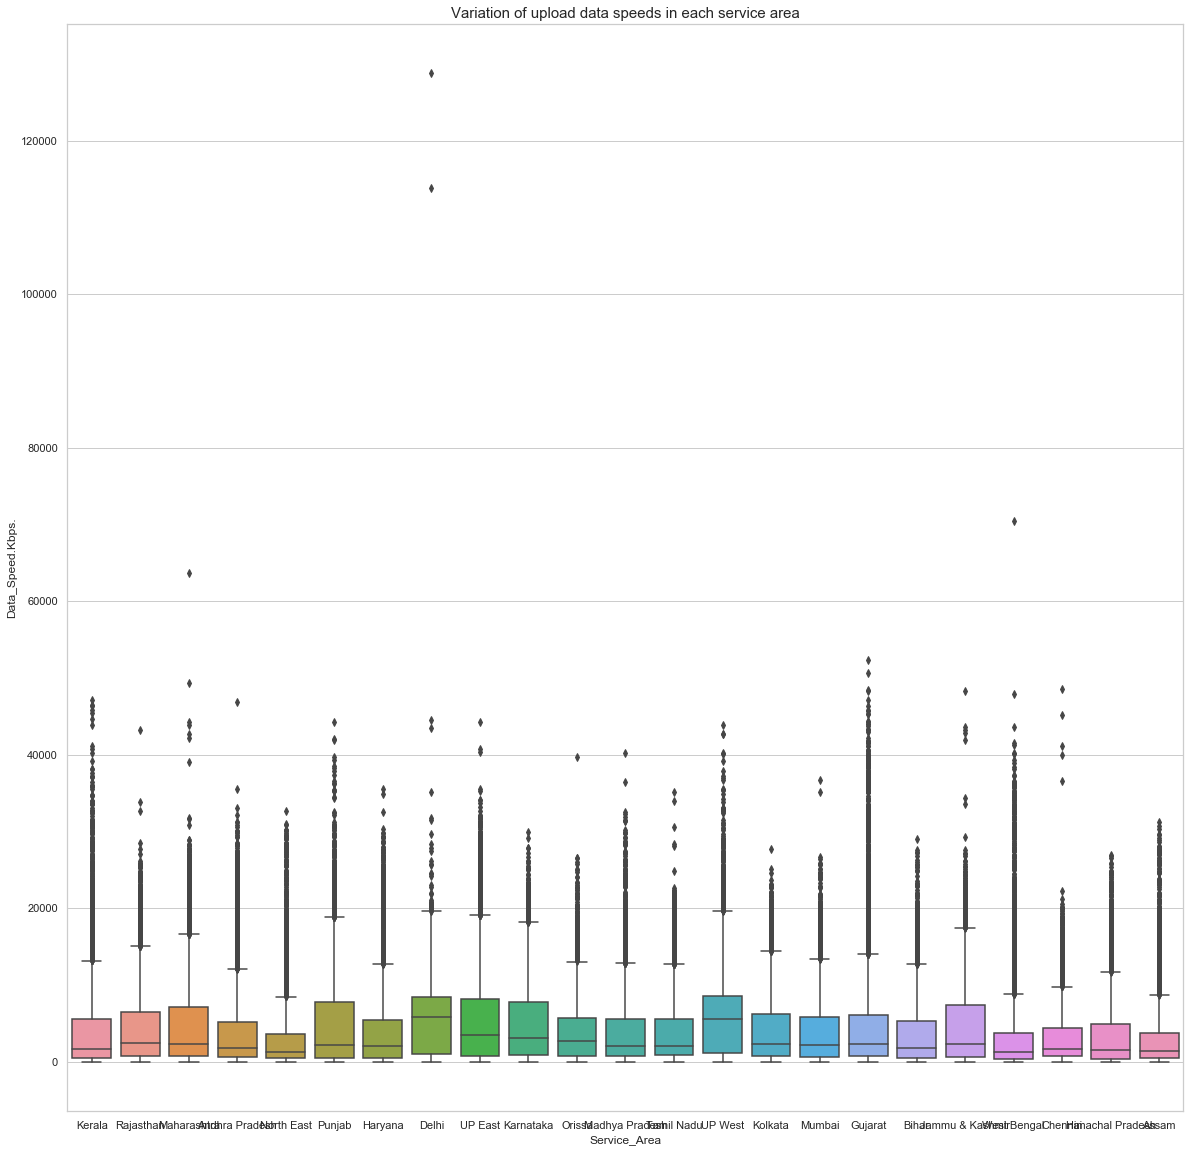

In [17]:
#upload speed data
upload_data=dataset[dataset['Download_Upload']=='upload']
plt.figure(figsize=(20, 20))
#Plotting the box plot for Service area Vs data speed to visualise the outliers for upload
sns.boxplot(x="Service_Area", y="Data_Speed.Kbps.", data=upload_data)
plt.title('Variation of upload data speeds in each service area',fontsize=15)
plt.show()

In [18]:
# download threshold is set to remove approximately top 1% of download data point as outliers
q75, q25 = np.percentile(download_data['Data_Speed.Kbps.'], [75 ,25])
download_thres=q75+(5.0)*(q75-q25)

In [19]:
print("Threshold for download is",download_thres)
x=len(download_data[download_data['Data_Speed.Kbps.']>download_thres])
print("Percentage of outliers",100*x/len(download_data))

Threshold for download is 74951.0
Percentage of outliers 0.9517290402411573


In [20]:
# upload threshold is set to remove approximately top 1% of upload data point as outliers
q75, q25 = np.percentile(upload_data['Data_Speed.Kbps.'], [75 ,25])
upload_thres=q75+(2)*(q75-q25)

In [21]:
print("Threshold for upload is",upload_thres)
x=len(upload_data[upload_data['Data_Speed.Kbps.']>upload_thres])
print("Percentage of outliers",100*x/len(upload_data))

Threshold for upload is 19940.0
Percentage of outliers 1.1659051022182871


In [22]:
# removing the points above their respective thresholds in download and upload data.
download_final=download_data[download_data['Data_Speed.Kbps.']<download_thres]
upload_final=upload_data[upload_data['Data_Speed.Kbps.']<upload_thres]

In [23]:
#combining the data points of states without outliers with the above outlier free data
to_append=[download_final,upload_final]
temp=dataset[dataset['Download_Upload']=='download']
arr = ['UP East','UP West','Delhi','Orissa']
for i in range(0,len(arr)):
    query='Service_Area ==' + "'"+arr[i]+"'" 
    to_append.append(temp.query(query))
outliers_removed=pd.concat(to_append)

In [24]:
# the final dataset after outlier analysis and removal
df = outliers_removed
df.head()

,Service_provider,technology,Download_Upload,Data_Speed.Kbps.,signal_strength,Service_Area
2,VODAFONE,4G,download,30759,-101.0,Kerala
3,VODAFONE,4G,download,29738,-101.0,Kerala
6,JIO,4G,download,14554,-102.0,Rajasthan
7,AIRTEL,3G,download,1419,-107.0,Rajasthan
8,JIO,4G,download,17458,-93.0,Rajasthan


## Part 4: Data Visualisation

### Distribution of entries among various values of an attribute

In [25]:
#Correlation statistics overall:
df.corr()

,Data_Speed.Kbps.,signal_strength
Data_Speed.Kbps.,1.000000,0.457296
signal_strength,0.457296,1.000000


In [26]:
#Correlation statistics for download data points:
df[df['Download_Upload']=='download'].corr()

,Data_Speed.Kbps.,signal_strength
Data_Speed.Kbps.,1.000000,0.605068
signal_strength,0.605068,1.000000


In [27]:
#Correlation statistics for upload data points:
df[df['Download_Upload']=='upload'].corr()

,Data_Speed.Kbps.,signal_strength
Data_Speed.Kbps.,1.00000,0.53352
signal_strength,0.53352,1.00000


technology
3G     34419
4G    591644
Name: technology, dtype: int64
626063


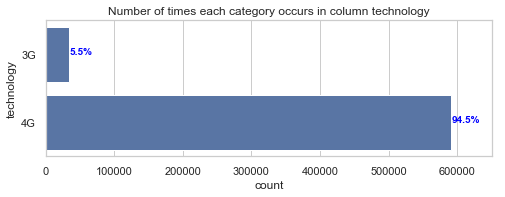

Download_Upload
upload      312547
download    313516
Name: Download_Upload, dtype: int64
626063


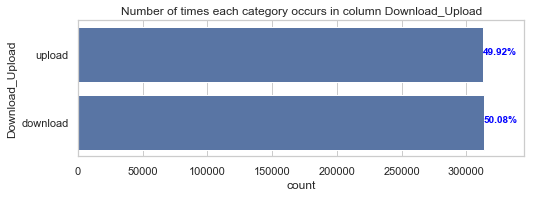

Service_provider
DOLPHIN         52
CELLONE      22971
VODAFONE     59792
IDEA         65416
AIRTEL       98103
JIO         379729
Name: Service_provider, dtype: int64
626063


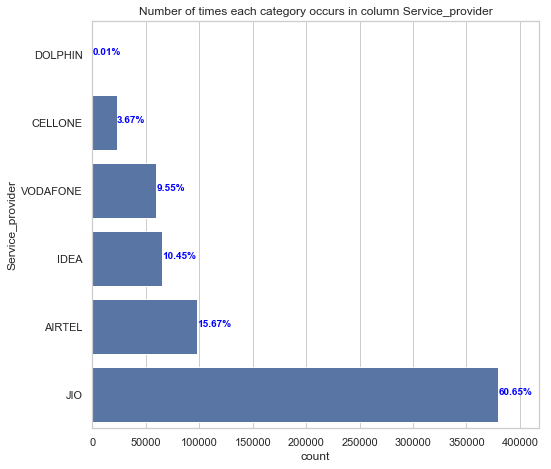

Service_Area
Jammu & Kashmir      6711
North East           6819
Himachal Pradesh     6852
Assam                7154
Chennai              7740
Haryana             12629
West Bengal         13660
Kolkata             14041
Bihar               16153
Orissa              16160
Mumbai              18938
Punjab              20524
Rajasthan           21106
Tamil Nadu          27433
Madhya Pradesh      28676
Gujarat             29394
UP West             35990
Karnataka           37020
Kerala              42593
Andhra Pradesh      45190
Delhi               52112
UP East             70660
Maharashtra         88508
Name: Service_Area, dtype: int64
626063


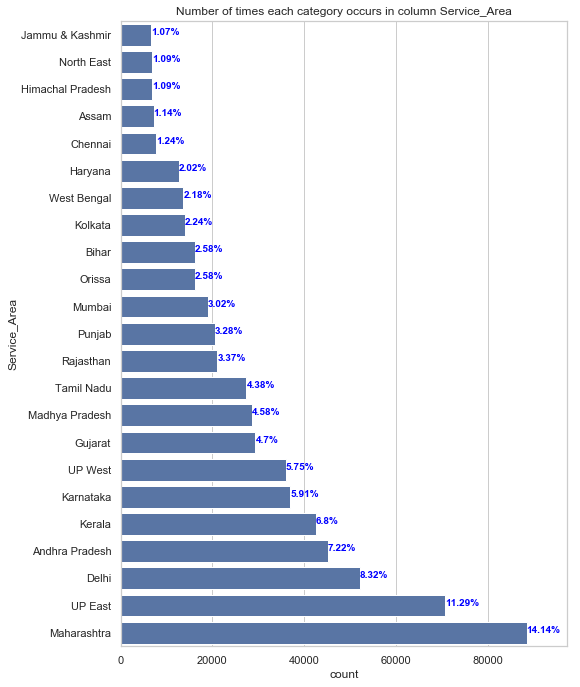

In [28]:
columns = ['technology', 'Download_Upload','Service_provider','Service_Area']

for c in columns:
    v = df[c].unique()
    
    #for each value of the attribute c, extracting count of the number of entities/rows having that value for the attribute.
    g = df.groupby(by=c)[c].count().sort_values(ascending=True)
    print(g.head(len(v)))
    tem = pd.DataFrame(columns = [c,'count'])
    tem[c] = g.index
    tem['count'] = np.array(g.head(len(v)))
    dims = (8, 2.5*len(v)/2)
    if c == 'Service_Area':
        dims = (8, len(v)/2)
    plt.figure(figsize=dims)
    plt.margins(x=0.1)
    
    #Bar plot: y-values of the attribute, x-number of rows
    gr=sns.barplot(x="count", y=c, data=tem,label="Total", color="b")
    total = sum(g.head(len(v)))
    print(total)
    for (i, u) in enumerate(g.head(len(v))):
        #Associate percentage labels with each bar in the plot
        gr.text(x = u, y = i, s = str(round(u/total*100, 2))+'%', color = 'blue', fontweight = 'bold')
    plt.title("Number of times each category occurs in column " + c)    
    plt.show() 

#### Basic bar plots of various categories in dataset. Number of times a category appears in given column.

* In technologies, 4G comprises of almost 95% of the dataset while 3G is only 5%. Hence number of people with 3G are much smaller compared to 4G users.
* Upload and Download tests are almost equal as they should be.
* In Service Providers JIO is currently dominating with 60.65% of whole dataset, that is greater than all other service providers put together.
* State wise, most samples occur in Maharashtra while least samples occur in Jammu and Kashmir.

### Average value of upload and download speeds , for both 3G and 4G in different states

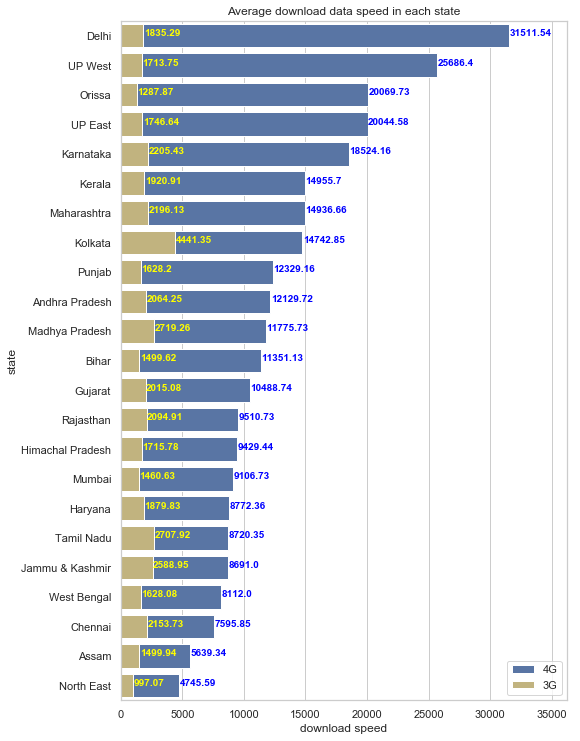

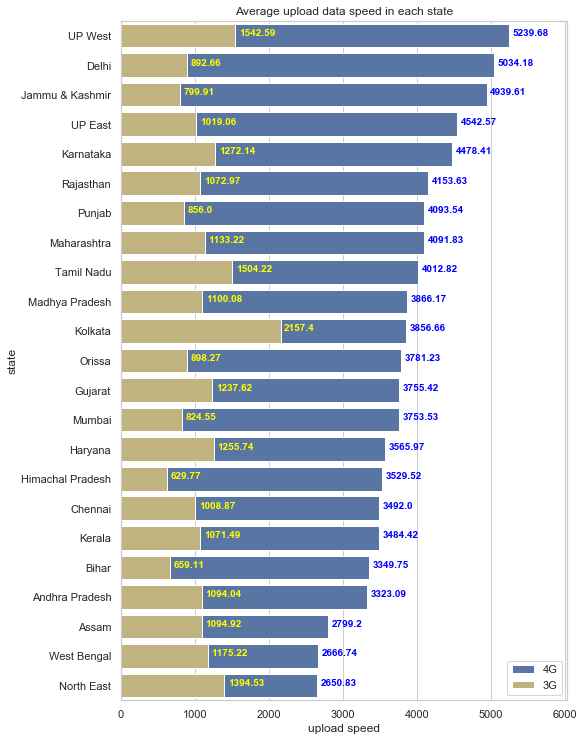

In [29]:
state = 'Service_Area'
service = 'Service_provider'
speed = 'Data_Speed.Kbps.'

values = df[state].unique()

#Extract graphs for visualizing both upload and download speeds
for tech in ['download','upload']:
    plt.figure(figsize = (8, len(values)/2 +1))
    plt.margins(x=0.15)
    
    #Filter entries having technology as 4G
    data = df.loc[df['Download_Upload'] == tech]
    data = data.loc[df['technology'] == '4G']
    
    #Extract mean value of 4G Data speeds in each state, arrange the states in descending order of their mean speeds
    group = data.groupby(by=state)[speed].mean().sort_values(ascending = False)
    tem = pd.DataFrame(columns=['state',tech + ' speed'])
    tem['state'] = group.index
    tem[tech + ' speed'] = np.array(group.head(len(values)))
    
    #Plot mean data speeds of each state as bar graph
    gr1=sns.barplot(x=tech + " speed",y='state', data=tem,label="4G", color="b")
    total = sum(group.head(len(values)))
    for (i, v) in enumerate(group.head(len(values))):
        #Associate each bar with it's data speed value
        gr1.text(x = v+50, y = i, s = str(round(v, 2)), color = 'blue', fontweight = 'bold')
        
    #Filter entries having technology as 3G   
    data = df.loc[df['Download_Upload'] == tech]
    data = data.loc[df['technology'] == '3G']
    
    #Extract mean 3G speeds for each state, order the states in the same order they had for 4G speeds 
    temp = data.groupby(by=state)[speed].mean()
    for v in group.index:
        group.head(len(values))[v] = temp.head(len(values))[v]
    tem['state'] = group.index
    tem[tech + ' speed'] = np.array(group.head(len(values)))
    
    #Bar plot of mean 3G speeds of each state, superimposed on the plot for 4G speeds 
    gr2=sns.barplot(x=tech +" speed", y='state', data=tem,label="3G", color="y")
    total = sum(group.head(len(values)))
    for (i, v) in enumerate(group.head(len(values))):
        gr2.text(x = v+50, y = i, s = str(round(v, 2)), color = 'yellow', fontweight = 'bold') 
    plt.legend(loc = 'lower right')  
    plt.title('Average '+tech+' data speed in each state')
    plt.show()

#### Average Download Speeds for different states for both 4g and 3g technologies.
* Average download speeds of 3g networks lies between 1-4.5 Mbps,and upload speeds between 0.6-2 Mbps. This is a lot less than what a 3g network should offer.
* Average download speeds of 4g networks lies between 4.5-31 Mbps, and upload speeds between 2.5-5 Mbps.
* The highest 4g network speed occurs for Dehli, which is explained by the speed distribtution of Dehli for all providers. Since Dehli is the capital of the country, high average speeds were expected.
* The lowest 4g speed occurs for north east states.

## 2-D Histograms
* This plot shows the variation of download speeds with respect signal strength.
* The colors indicate frequency of points that lie in that region

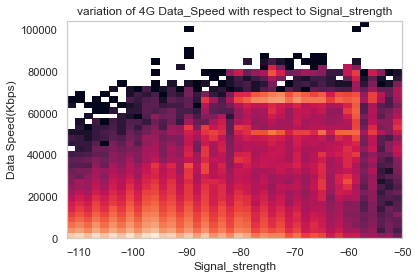

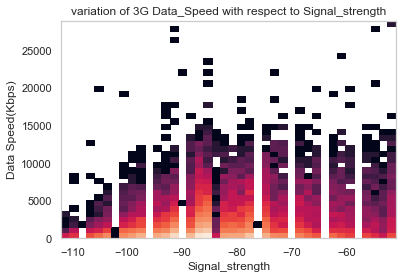

In [30]:
data = df.loc[df['Download_Upload'] == 'download']
data = data.loc[df['technology'] == '4G']
x = data['signal_strength']
y = data['Data_Speed.Kbps.']
plt.hist2d(x, y, bins = 40, norm=colors.LogNorm())
plt.ylabel('Data Speed(Kbps)')
plt.xlabel('Signal_strength')
plt.title('variation of 4G Data_Speed with respect to Signal_strength')
plt.show()

data = df.loc[df['Download_Upload'] == 'download']
data = data.loc[df['technology'] == '3G']
x = data['signal_strength']
y = data['Data_Speed.Kbps.']
plt.hist2d(x, y, bins = 40, norm=colors.LogNorm())
plt.ylabel('Data Speed(Kbps)')
plt.xlabel('Signal_strength')
plt.title('variation of 3G Data_Speed with respect to Signal_strength')
plt.show()

### Average Download Data speeds provided by each Service provider

['VODAFONE' 'JIO' 'AIRTEL' 'IDEA' 'CELLONE' 'DOLPHIN']


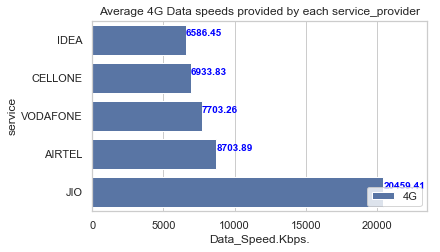

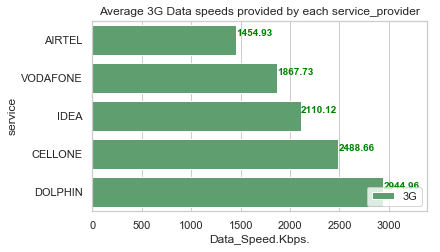

In [31]:
#Print service providers
print(df[service].unique())

#Extract 4G download speeds and find the average for each provider,arrange the providers in a descending order of their average speeds 
data = df.loc[df['Download_Upload'] == 'download']
data = data.loc[df['technology'] == '4G']
values = data[service].unique()
group = data.groupby(by=service)[speed].mean().sort_values(ascending = True)
r = np.arange(len(values))
tem = pd.DataFrame()
tem['service']=group.index
tem['speed']=np.array(group.head(len(values)))

#Bar plot of average 4G download speeds of evey provider
plt.figure(figsize = (6, len(values)/2 +1))
gr1 = sns.barplot(y = tem['service'], x=tem['speed'],data=tem, label = '4G',color='b')
for (i, v) in enumerate(group.head(len(values))):
    #Associate average speed with each bar
    gr1.text(x = v + 0.2, y = i - 0.1, s = str(round(v, 2)), color = 'blue', fontweight = 'bold')
plt.yticks(r, group.index)
plt.xlabel(speed)
plt.margins(x = 0.15)
plt.legend(loc = 'lower right')
plt.title('Average 4G Data speeds provided by each service_provider')


#Extract 3G download speeds and find the average for each provider,arrange the providers in a descending order of their average speeds 
data = df.loc[df['Download_Upload'] == 'download']
data = data.loc[df['technology'] == '3G']
values = data[service].unique()
group = data.groupby(by=service)[speed].mean().sort_values(ascending = True)
r = np.arange(len(values))
tem['service']=group.index
tem['speed']=np.array(group.head(len(values)))

#Bar plot of average 3G download speeds of evey provider
plt.figure(figsize = (6, len(values)/2 +1))
gr2 = sns.barplot(y = tem['service'], x=tem['speed'],data=tem, label = '3G',color='g')
for (i, v) in enumerate(group.head(len(values))):
    gr2.text(x = v + 0.02, y = i - 0.1, s = str(round(v, 2)), color = 'green', fontweight = 'bold')
plt.yticks(r, group.index)
plt.xlabel(speed)
plt.margins(x = 0.15)
plt.legend(loc = 'lower right')
plt.title('Average 3G Data speeds provided by each service_provider')
plt.show()

#### Finally bar plots for average 4g and 3g network speeds for each provider.
* One important fact noticed here is that Jio doesn't provide 3G, which says that Jio is capable of provding 4G to all of it's consumers. Doplhin doesn't provide 3G.
* In 4g networks, JIO is the one with max average speed followed by airtel.
* In 3g networks, Dolphin is the one with max average speed. But the speed distribution of aircel reveals very less numbers of customers and since they only provide 3G, all of their resources go towards it, hence the higher speeds.
* Other than Jio all the service providers are giving average 4g speeds of 6-9 Mbps which is much lower than speeds that they should be giving.

In [32]:
#Removal of outliers has corrupted our index, making it discontinuous. Hence reconstructing a continuous index
df = df.reset_index()
df = df.drop(['index'],axis=1)
df.head()

,Service_provider,technology,Download_Upload,Data_Speed.Kbps.,signal_strength,Service_Area
0,VODAFONE,4G,download,30759,-101.0,Kerala
1,VODAFONE,4G,download,29738,-101.0,Kerala
2,JIO,4G,download,14554,-102.0,Rajasthan
3,AIRTEL,3G,download,1419,-107.0,Rajasthan
4,JIO,4G,download,17458,-93.0,Rajasthan


# Part 5: Data Preprocessing  

## Stratified Random sampling

Stratified random sampling was performed because we had larger number of points than required, hence reducing the numerosity speeds up our analysis process. Sampling was done in a stratified way in order to preserve the underlying distributions/proportions and patterns in our data.

In [33]:
#calculating the unique providers
providers=df['Service_provider'].unique()

#caluating the unique service areas
states=df['Service_Area'].unique()

#Final threshold implying datpoints after sampling
threshold=(int)(len(df)/2);

#Temporary list to append datframes from each strata
to_append=[]

for provider in providers:
    for state in states:
        temp=df.query('Service_provider ==' + "'"+ provider +"'" + "and " +'Service_Area ==' + "'"+ state +"'")
        cnt=len(temp)
#         print(state,provider,cnt)
        if(provider=='CELLONE' or provider=='DOLPHIN'):
            to_append.append(temp)
        elif cnt>0:    
            prop=cnt/len(df)
            to_append.append(temp.sample((int)(prop*threshold)))

#Sampled Data
sampled_data=pd.concat(to_append)
sampled_data =sampled_data.sample(frac=1, axis=1).reset_index(drop=True)
df = sampled_data
df.shape

(324478, 6)

## Data Transformation: standardisation

#### Standardization on Data Speed and Signal Strength
Most of the machine learning algorithms(including regression and clustering) perform better and faster if all the attributes follow the same scale/distribution. Hence data speeds and signal strengths were normalized 

In [34]:
data_speed_mean = df['Data_Speed.Kbps.'].mean()
data_speed_std = df['Data_Speed.Kbps.'].std()

# Standardizing the Data Speed column
df['Data_Speed.Kbps.'] = (df['Data_Speed.Kbps.'] - data_speed_mean) / data_speed_std

signal_strength_mean = df['signal_strength'].mean()
signal_strength_std = df['signal_strength'].std()

# Standardizing the Signal Strength column
df['signal_strength'] = (df['signal_strength'] - signal_strength_mean) / signal_strength_std

df.head()

,signal_strength,Service_Area,technology,Service_provider,Download_Upload,Data_Speed.Kbps.
0,-1.358241,Kerala,4G,VODAFONE,download,1.177706
1,-0.813789,Kerala,4G,VODAFONE,download,-0.548407
2,-0.813789,Kerala,4G,VODAFONE,download,0.188400
3,0.411229,Kerala,3G,VODAFONE,upload,-0.566863
4,-0.677676,Kerala,4G,VODAFONE,download,0.994200


## One Hot Encoding
Convert each categorical attribute into a number of assymetrical binary attributes for easier analysis

In [35]:
def one_hot(df,col):
    #Obtain all unique values
    values = df[col].unique()
    
    #Assign column numbers for each value
    val_dict = {}
    for i in range(len(values)):
        val_dict[values[i]] = i
    new_cols = []
    old_col = df[col].values
    
    #Construct one-hot encoded matrix
    for i in range(len(old_col)):
        arr = np.zeros(len(values),dtype=int)
        arr[val_dict[old_col[i]]]=1
        new_cols.append(arr)
    sub_df = pd.DataFrame(new_cols,columns=values,dtype=int)
    sub_df = sub_df.astype(int)
    return sub_df

In [36]:
#Obtain one hot encoded matrix for each categorical attribute, merge with main dataset and drop the original column for that categorical attribute 
udf = one_hot(df,service)
new_df = pd.concat([df,udf],axis=1,join='inner')
new_df = new_df.drop([service],axis=1)
print(new_df.shape)

(324478, 11)


In [37]:
udf = one_hot(new_df,'technology')
new_df = pd.concat([new_df,udf],axis=1)
new_df = new_df.drop(['technology'],axis=1)
udf = one_hot(new_df,'Download_Upload')
new_df = pd.concat([new_df,udf],axis=1)
new_df = new_df.drop(['Download_Upload'],axis=1)
udf = one_hot(new_df,'Service_Area')
new_df = pd.concat([new_df,udf],axis=1)
new_df = new_df.drop(['Service_Area'],axis=1)
new_df.head()

,signal_strength,Data_Speed.Kbps.,VODAFONE,JIO,AIRTEL,IDEA,CELLONE,DOLPHIN,4G,3G,...,Chennai,Delhi,UP East,Orissa,UP West,Punjab,Madhya Pradesh,Bihar,Jammu & Kashmir,Himachal Pradesh
0,-1.358241,1.177706,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.813789,-0.548407,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.813789,0.188400,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.411229,-0.566863,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,-0.677676,0.994200,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
#New shape of the Dataframe after sampling and one-hot encoding
new_df.shape

(324478, 35)

# Regression

### Here we are developing a liner regression model to predict the data speeds using the other features, since we obtained a healthy correlation between signal strength and data speed, we can obtain a good predective model.

In [39]:
#create a new copy for regression purposes
reg_df = new_df.copy()
reg_df.columns

Index(['signal_strength', 'Data_Speed.Kbps.', 'VODAFONE', 'JIO', 'AIRTEL',
       'IDEA', 'CELLONE', 'DOLPHIN', '4G', '3G', 'download', 'upload',
       'Kerala', 'Rajasthan', 'Andhra Pradesh', 'North East', 'Maharashtra',
       'Haryana', 'Gujarat', 'Karnataka', 'Tamil Nadu', 'Kolkata', 'Mumbai',
       'Assam', 'West Bengal', 'Chennai', 'Delhi', 'UP East', 'Orissa',
       'UP West', 'Punjab', 'Madhya Pradesh', 'Bihar', 'Jammu & Kashmir',
       'Himachal Pradesh'],
      dtype='object')

In [40]:
# Dropping Dolphin, 3g, upload, and Jammu & Kashmir, The columns have been dropped as they are redundant
# Having redundant features may cause our regression problem to not have an unique solution
drop_cols = ['DOLPHIN','3G','upload','Jammu & Kashmir']
reg_df = reg_df.drop(drop_cols,axis=1)
reg_df.shape

(324478, 31)

In [41]:
#Shuffling the dataset
values = reg_df.values
np.random.seed(42)
np.random.shuffle(values)
print(values.shape)
shuf_df = pd.DataFrame(values,columns = reg_df.columns)
shuf_df.head()

(324478, 31)


,signal_strength,Data_Speed.Kbps.,VODAFONE,JIO,AIRTEL,IDEA,CELLONE,4G,download,Kerala,...,West Bengal,Chennai,Delhi,UP East,Orissa,UP West,Punjab,Madhya Pradesh,Bihar,Himachal Pradesh
0,0.343172,-0.201959,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.432077,3.633380,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.813789,-0.568040,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.154072,-0.566306,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.677676,-0.432161,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
Y = shuf_df['Data_Speed.Kbps.']
X = shuf_df.drop(['Data_Speed.Kbps.'],axis=1)

In [43]:
#Splitting the features and the target variable into test and train sets
X_train = X.values[:][:250000]
print(X_train.shape)
Y_train = Y.values[:][:250000]
print(Y_train.shape)
X_test = X.values[:][250000:]
print(X_test.shape)
Y_test = Y.values[:][250000:]
print(Y_test.shape)

(250000, 30)
(250000,)
(74478, 30)
(74478,)


In [44]:
#The cost or loss for our regression model - Sum of squares of errors
def calc_cost(X,Y,theta, theta0):
    predictions = np.dot(X,theta) + theta0
    cost = np.sum((Y-predictions)**2)/2
    return cost

Iteration : 0   Cost: 111929.75837202359
Iteration : 50   Cost: 80869.54239171502
Iteration : 100   Cost: 79845.67314984972
Iteration : 150   Cost: 79532.60449751672
Iteration : 200   Cost: 79379.92100575208
Iteration : 250   Cost: 79293.61309612487
Iteration : 300   Cost: 79241.91185184549
Iteration : 350   Cost: 79210.00925304559
Iteration : 400   Cost: 79189.96157471341
Iteration : 450   Cost: 79177.20124124177
Iteration : 500   Cost: 79168.99656322287
Final Cost: 79165.33365913205


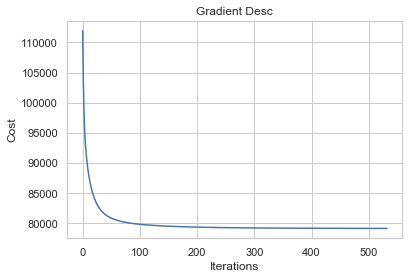

[ 0.43951723 -0.11044734  0.0030414  -0.12445162 -0.18210572 -0.30414925
  0.47886476  0.67205343  0.14867198 -0.14701334 -0.0790381  -0.11700363
 -0.00664799 -0.11167986 -0.06634123 -0.04327008 -0.09768585 -0.02277727
 -0.13432262 -0.11042874 -0.02105345 -0.15906643  0.21405876  0.07168534
  0.0212241   0.26603324 -0.06990654 -0.04333989 -0.03026433 -0.04384745]


In [45]:
#We have used gradient descet to find the optimal values for our model parameters

#Maximum iterations have been set to 5000, learning rate of 0.000001 and a exit condition being the difference between the 
#losses of two successive iterations falls less than 0.1

cost_hist = []
itr_hist = []
prev_cost = 0
lr = 0.000001

#Initialize parameters
theta = np.zeros(X_train.shape[1],dtype="float")
theta0 = 0
for it in range(5000):
    predictions = np.dot(X_train,theta) + theta0
    
    #Gradient descent
    for i in range(len(theta)):
        theta[i] = theta[i] - lr * np.dot(predictions-Y_train,X_train[:,i])
    theta0 -= lr * np.sum(predictions - Y_train)
    curr_cost = calc_cost(X_train,Y_train,theta, theta0)
    itr_hist.append(it)
    cost_hist.append(curr_cost)
    if it%50 == 0:
        print("Iteration :",it,"  Cost:",curr_cost)
        
    #Exit condition    
    if abs(curr_cost - prev_cost) < 0.1:
        print("Final Cost:",curr_cost)
        break
    prev_cost = curr_cost

#Plot the loss against the number of iterations
plt.plot(itr_hist,cost_hist)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Gradient Desc")
plt.show()
print(theta)

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

## Performance metrics - Test set

In [47]:
pred = np.dot(X_test,theta) + theta0
print("RMSE Test: ",sqrt(mean_squared_error(Y_test, pred)))
print("R2 Score Test: ",r2_score(Y_test,pred))

RMSE Test:  0.7949925890935275
R2 Score Test:  0.36558130767862995


## Performance metrics - Train set

In [48]:
pred = np.dot(X_train,theta) + theta0
print("RMSE Test: ",sqrt(mean_squared_error(Y_train, pred)))
print("R2 Score Test: ",r2_score(Y_train,pred))

RMSE Test:  0.7958157257010297
R2 Score Test:  0.36738919544368975


## Results and Analysis

### On the test set we have obtained a RMSE error of 0.794. Our output variable is standardized (Refer the cell below) , whicg means the 95% of the values lie between -2 and 2. For this range of output values, a RMSE score of 0.794 is very good and is an indicator that our model is performing well

### The RMSE and R2 scores of the model for both train and test set are very close to each other, indicating our model has not overfit on the training data

In [49]:
shuf_df.describe()

,signal_strength,Data_Speed.Kbps.,VODAFONE,JIO,AIRTEL,IDEA,CELLONE,4G,download,Kerala,...,West Bengal,Chennai,Delhi,UP East,Orissa,UP West,Punjab,Madhya Pradesh,Bihar,Himachal Pradesh
count,3.244780e+05,3.244780e+05,324478.000000,324478.000000,324478.000000,324478.000000,324478.000000,324478.000000,324478.000000,324478.000000,...,324478.000000,324478.000000,324478.000000,324478.000000,324478.000000,324478.000000,324478.000000,324478.000000,324478.000000,324478.000000
mean,1.134352e-16,3.371740e-17,0.092086,0.585084,0.151117,0.100759,0.070794,0.920503,0.500447,0.070214,...,0.021052,0.013406,0.080311,0.108879,0.024892,0.055464,0.031632,0.048003,0.024886,0.010562
std,1.000000e+00,1.000000e+00,0.289148,0.492708,0.358163,0.301009,0.256480,0.270513,0.500001,0.255508,...,0.143559,0.115006,0.271774,0.311488,0.155797,0.228885,0.175020,0.213773,0.155778,0.102226
min,-1.562411e+00,-5.745429e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.137889e-01,-5.237585e-01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.012799e-01,-3.901706e-01,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.834553e-01,-3.585636e-02,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.657095e+00,5.588271e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# KMeans

###### Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the inter-cluster data points as similar as possible while also keeping the clusters as different (far) as possible.

In [50]:
#initialisation 
#Declaring the termination conditions for the K-means Alogrithm
# Tolerance is the minimum change in clusteroid vector required to continue with the next iteration.If change is less than
#tolerance we stop the algorithm.
tolerance = 0.0001
#The maximum number of iterations allowed.
max_iterations = 500
#dividing the dataset into upload and download data
upl_dataset = new_df[new_df['upload'] == 1]
dwn_dataset = new_df[new_df['download'] == 1]

In [51]:
import random 
# The function takes three inputs the state concerned , the type of data to cluster in that state i.e upload or download and the number of clusters.
# The function returns the centroids of each clusters along with all the points in that cluster. 

def K_means(state,upl_dwn,k):
    #picking attributes on which clustering is to be performed and the type of data(download/upload) 
    if upl_dwn == 'download':
        data = dwn_dataset[dwn_dataset[state] == 1][['Data_Speed.Kbps.','signal_strength','4G']]
    else:
        data = upl_dataset[upl_dataset[state] == 1][['Data_Speed.Kbps.','signal_strength','4G']]
    
     # randomly initializing the centroids
    centroids = []
    for i in range(k):
        index = int(random.uniform(0,len(data)-1))
        centroids.append(data.iloc[index , :])
    
    classes = [] 
    for i in range(max_iterations):
        
        for i in range(k):
            classes.append([])
        
        for i in range(0,len(data)):
           # print(features)
            distances = []
            for centroid in centroids:
                # calculating the euclidean distance of the point from the centroid
                distances.append(np.linalg.norm(data.iloc[i,:]-centroid))
            # calculating the index of the centroid to which it is closest
            classification = distances.index(min(distances))
            #adding the point to the cluster corresponding to that centroid
            classes[classification].append(data.iloc[i,:])

        previous = centroids
        #average the cluster datapoints to re-calculate the centroids
        for classification in range(0,len(classes)):
            centroids[classification] = np.average(classes[classification], axis = 0)
        
        #Assuming that the clustering is optimal
        isOptimal = True
        
        # Checking the tolerance condition i.e if the change between new clusteriod vector and the previous clusteroid vector is above tolerance
        # we see this as unoptimal solution(isOptimal=False) and continue to next iteration.
        
        for centroid in range(0,len(centroids)):
            original_centroid = previous[centroid]
            curr = centroids[centroid]
            if np.sum((curr - original_centroid)/original_centroid * 100.0) > tolerance:
                isOptimal = False
                
        #break out of the main loop if the results are optimal, ie. the centroids don't change their positions much(more than our tolerance)
        if isOptimal:
            break
    return classes,centroids    

## Elbow Method For Fixing Number of Clusters

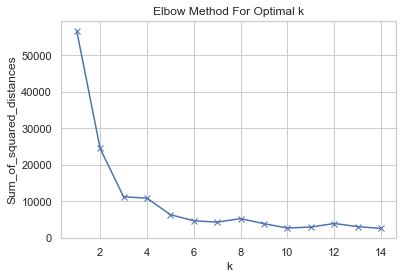

In [55]:
fun = dwn_dataset[dwn_dataset['Delhi'] == 1][['Data_Speed.Kbps.','signal_strength','4G']]

Sum_of_squared_distances = []
# the number of clusters on which to plot the graph.
K = range(1,15)
for k in K:
    #Perfoming K-means using number of clusters as k(The loop variable)
    classes,centroids = K_means('Delhi','download',k)
    #Initializing the sum of squared error
    error=0
    for i in range(0,k):
        for j in range(0,len(classes[i])):
            #calculating the sum of squared error for each point.
            error+=np.linalg.norm(classes[i][j]-centroids[i])*np.linalg.norm(classes[i][j]-centroids[i])
    #appending the error which we got for k number of clusters.        
    Sum_of_squared_distances.append(error)

    
# Plotting the graph with x as number of clusters and y as sum of square distances.

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [76]:
#setting the number of clusters as 3 using the above curve
classes,centroids = K_means('Delhi','download',3)

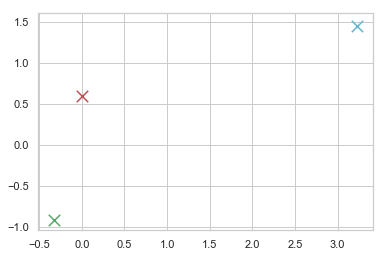

In [77]:
# Plotting starts here, the colors
colors = ["r", "g", "c", "b", "k"]

for centroid in range(0,len(centroids)):
    plt.scatter(centroids[centroid][0], centroids[centroid][1],color=colors[centroid],s = 130, marker = "x")

plt.show()
    

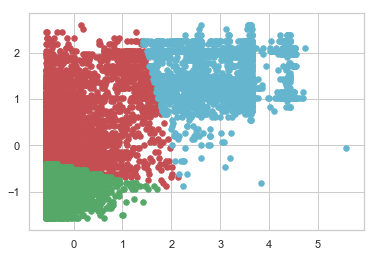

In [78]:
#plotting the points in 2-D with their respective cluster colors.
for classification in range(0,len(classes)):
    color = colors[classification]
    for features in classes[classification]:
        plt.scatter(features[0], features[1], color = color,s = 30)
        
plt.show()

## Rating system

### In order to rate the service providers, we rate the clusters first, then based on the proportions of points of a service provider in these clusters, we rate the providers

### To rate the clusters, we are using their centroid. The centroid of a cluster is defined using mean values of data speeds, signal strenghts and proportion of 4G points in that cluster. A higher value for each dimension of the centroid indicates a good cluster, hence we convert the 3-D centroid point to a scalar value and use these values to rate the service providers

In [79]:
providers = ['JIO','AIRTEL','VODAFONE','IDEA','CELLONE','DOLPHIN']
def get_scores(dataset,centroids,state):
    
    #Rate each cluster
    weights = []
    for i in range(len(centroids)):
        weights.append(np.sum(centroids[i]))
    ratings = []
    for i in range(len(weights)):
        try:
            ratings.append((weights[i]-np.min(weights))/(np.max(weights) - np.min(weights)))
        except:
            ratings.append(0)
    
    #Rate each service provider
    scores = {}
    data = dataset[dataset[state] == 1]
    for p in providers:
        prd = data[data[p] == 1][['Data_Speed.Kbps.','signal_strength','4G']]
        sc_sum = 0.0
        for i in range(0,len(prd)):
            distances = []
            for centroid in centroids:
                distances.append(np.linalg.norm(prd.iloc[i,:]-centroid))
            classification = distances.index(min(distances))
            sc_sum += ratings[classification]
        if len(prd)>0:
            scores[p] = {'sc':sc_sum/len(prd), 'cnt':len(prd)}
        else:
            scores[p] = {'sc':0.0, 'cnt':0}
    return scores

### Performance Analysis of Service Providers in all the Service Areas

Andhra Pradesh
{'JIO': 1.8540940823767245, 'AIRTEL': 1.6459737843910882, 'VODAFONE': 0.5, 'IDEA': 1.5366691644366433, 'CELLONE': 3.2728766905266973, 'DOLPHIN': 0.0}


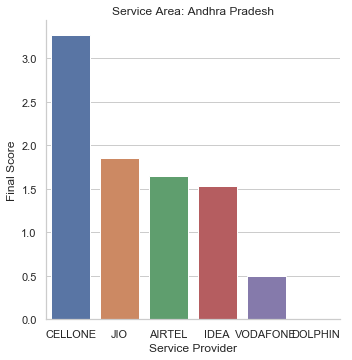

Assam
{'JIO': 1.9376807062284658, 'AIRTEL': 2.375483278367717, 'VODAFONE': 2.7508451836819052, 'IDEA': 0.0, 'CELLONE': 4.0, 'DOLPHIN': 0.0}


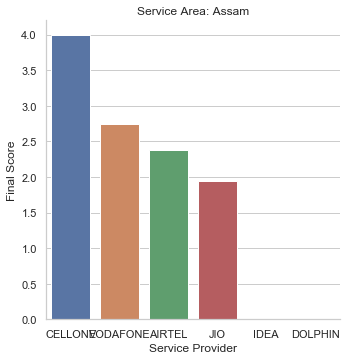

Bihar
{'JIO': 1.6206044936155923, 'AIRTEL': 0.8576687257501288, 'VODAFONE': 0.0, 'IDEA': 1.3148451770490563, 'CELLONE': 0.6063688841590965, 'DOLPHIN': 0.0}


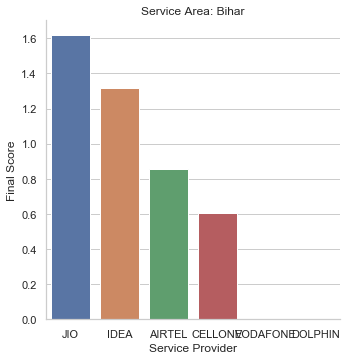

Chennai
{'JIO': 1.3361026063572103, 'AIRTEL': 1.517632877402897, 'VODAFONE': 1.7018778279707458, 'IDEA': 2.1218360129337874, 'CELLONE': 3.3371828146122127, 'DOLPHIN': 0.0}


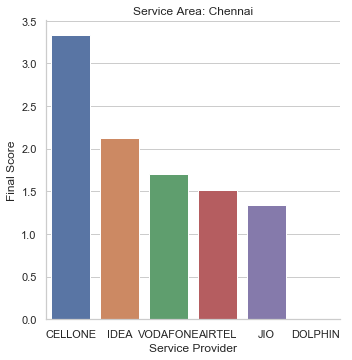

Delhi
{'JIO': 2.147220684912539, 'AIRTEL': 0.15677373094411695, 'VODAFONE': 0.14494872409055137, 'IDEA': 0.32871505445625265, 'CELLONE': 0.0, 'DOLPHIN': 0.0}


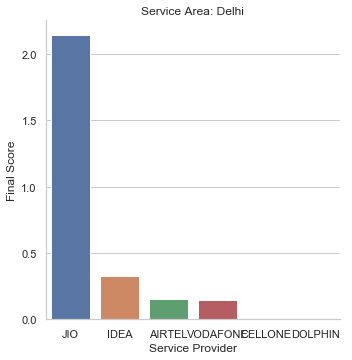

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in true_divide


Gujarat
{'JIO': 1.2407054984014034, 'AIRTEL': 0.8891904612861857, 'VODAFONE': 0.7892564643550475, 'IDEA': 1.1267657256214547, 'CELLONE': 0.0, 'DOLPHIN': 0.0}


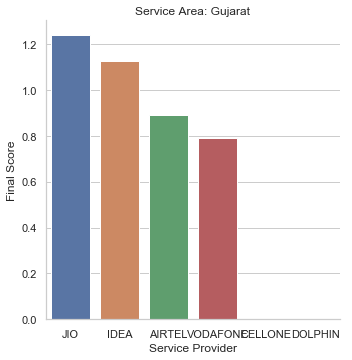

Haryana
{'JIO': 1.9151146702334048, 'AIRTEL': 2.272795874680884, 'VODAFONE': 2.0906426523808737, 'IDEA': 2.4762846340693097, 'CELLONE': 0.0, 'DOLPHIN': 0.0}


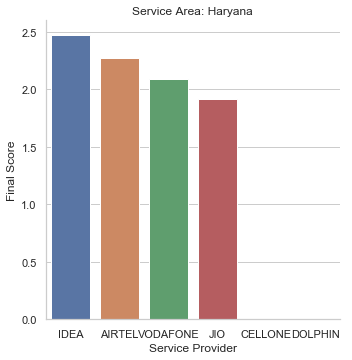

Himachal Pradesh
{'JIO': 1.9397302981072437, 'AIRTEL': 1.8478252421976231, 'VODAFONE': 0.0, 'IDEA': 3.1007607717306462, 'CELLONE': 1.0, 'DOLPHIN': 0.0}


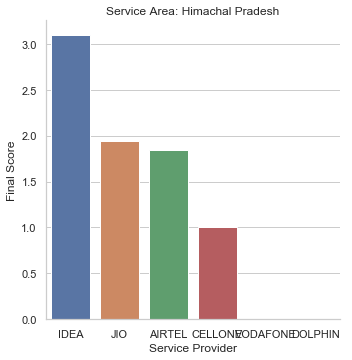

Jammu & Kashmir
{'JIO': 1.627554415489288, 'AIRTEL': 1.6025708096996492, 'VODAFONE': 0.0, 'IDEA': 2.4868999181054035, 'CELLONE': 3.24176141783534, 'DOLPHIN': 0.0}


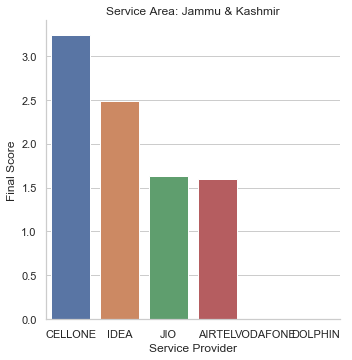

Karnataka
{'JIO': 1.8314434268000037, 'AIRTEL': 0.2917271650749683, 'VODAFONE': 0.567847725716003, 'IDEA': 0.6409240311162688, 'CELLONE': 0.3988247536268521, 'DOLPHIN': 0.0}


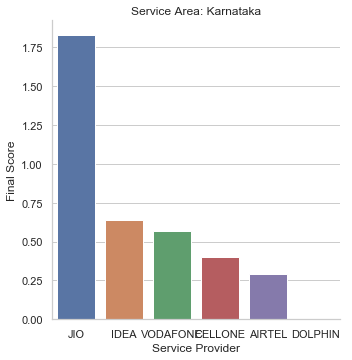

Kerala
{'JIO': 1.4507998723980449, 'AIRTEL': 0.5292573493671376, 'VODAFONE': 0.46598340517212883, 'IDEA': 0.4035438423234261, 'CELLONE': 0.3697683842932081, 'DOLPHIN': 0.0}


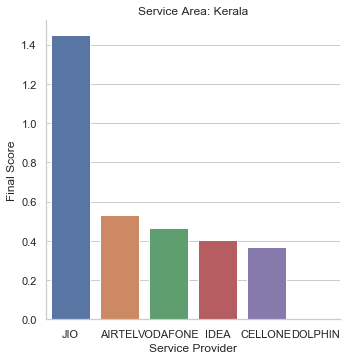

Kolkata
{'JIO': 1.2995427191030093, 'AIRTEL': 0.5286188305290025, 'VODAFONE': 0.5453079046134858, 'IDEA': 1.2680833591898155, 'CELLONE': 1.9213495724808227, 'DOLPHIN': 0.0}


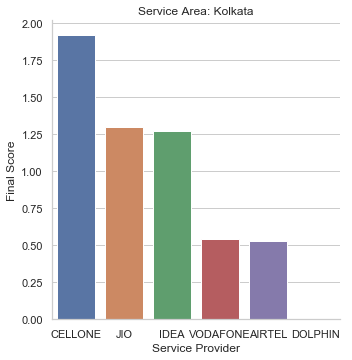

Madhya Pradesh
{'JIO': 0.9222571680463064, 'AIRTEL': 0.5125781671698063, 'VODAFONE': 0.0, 'IDEA': 0.3687853540647791, 'CELLONE': 0.5203891684314046, 'DOLPHIN': 0.0}


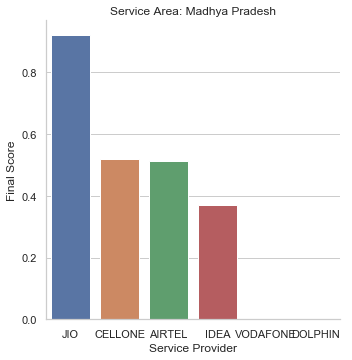

Maharashtra
{'JIO': 1.7286993831728714, 'AIRTEL': 0.6434808940702279, 'VODAFONE': 0.5884529395763659, 'IDEA': 0.716846599712141, 'CELLONE': 0.8981542181868403, 'DOLPHIN': 0.0}


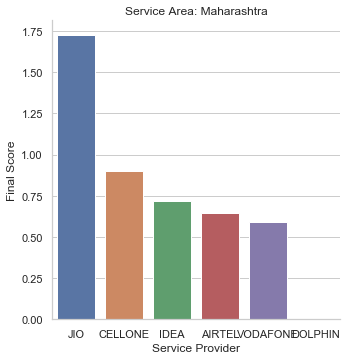

Mumbai
{'JIO': 1.8783880894683234, 'AIRTEL': 1.4795380865843004, 'VODAFONE': 1.5769151116083533, 'IDEA': 1.53832463740835, 'CELLONE': 0.0, 'DOLPHIN': 1.8544142394582077}


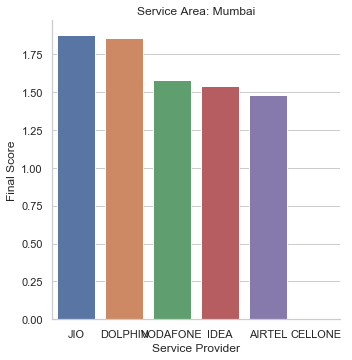

North East
{'JIO': 0.8787256815577642, 'AIRTEL': 0.9160883059392695, 'VODAFONE': 1.1320205278746966, 'IDEA': 0.0, 'CELLONE': 0.9054220753470239, 'DOLPHIN': 0.0}


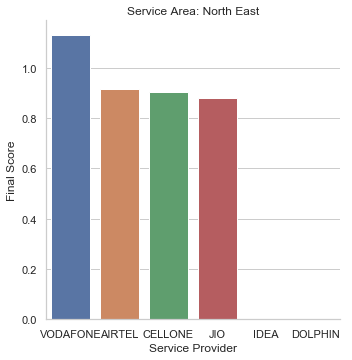

Orissa
{'JIO': 1.4376424978125966, 'AIRTEL': 0.3299096961462575, 'VODAFONE': 0.49755383221600813, 'IDEA': 0.35529853223895613, 'CELLONE': 0.0, 'DOLPHIN': 0.0}


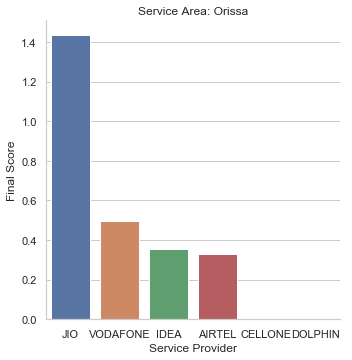

Punjab
{'JIO': 2.0983743346345287, 'AIRTEL': 1.3460159269687269, 'VODAFONE': 0.0, 'IDEA': 1.2795296153848634, 'CELLONE': 2.1705659383227696, 'DOLPHIN': 0.0}


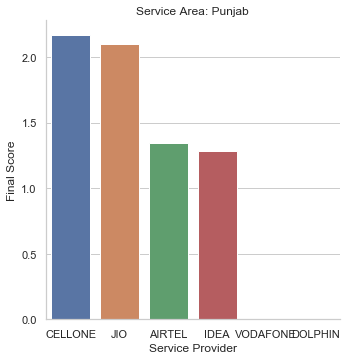

Rajasthan
{'JIO': 1.8827482423789321, 'AIRTEL': 1.6543775228046331, 'VODAFONE': 1.8988547988572453, 'IDEA': 2.060379364291487, 'CELLONE': 3.4794308173352144, 'DOLPHIN': 0.0}


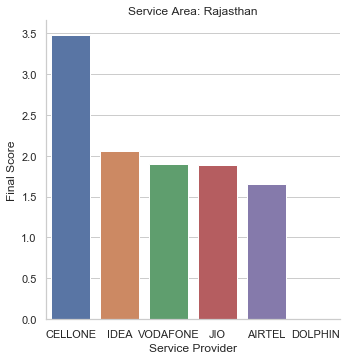

Tamil Nadu
{'JIO': 1.594296266974794, 'AIRTEL': 1.8648577980314225, 'VODAFONE': 1.8778280611117366, 'IDEA': 2.1471801449235683, 'CELLONE': 3.1790345645576563, 'DOLPHIN': 0.0}


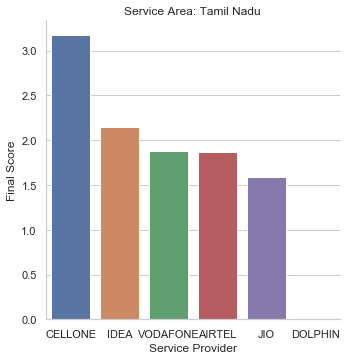

UP East
{'JIO': 2.0889716526806894, 'AIRTEL': 0.6965985271384644, 'VODAFONE': 0.6771027199812933, 'IDEA': 0.6441165388448289, 'CELLONE': 1.1316061160237592, 'DOLPHIN': 0.0}


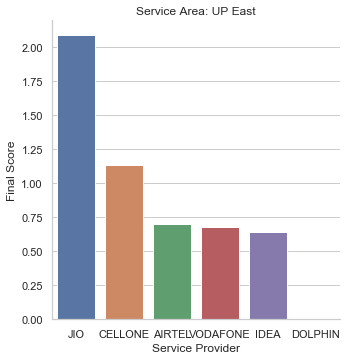

UP West
{'JIO': 2.3102607846898557, 'AIRTEL': 0.43491643529788343, 'VODAFONE': 0.30901143543749815, 'IDEA': 0.3395374682804178, 'CELLONE': 0.9214445097103565, 'DOLPHIN': 0.0}


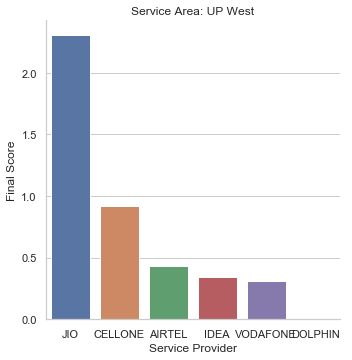

West Bengal
{'JIO': 0.8352977877229335, 'AIRTEL': 0.6781221363979475, 'VODAFONE': 1.211495771867212, 'IDEA': 1.1720369560443147, 'CELLONE': 1.6190628626913575, 'DOLPHIN': 0.0}


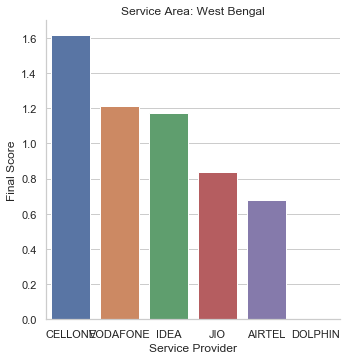

In [80]:
import operator

service_areas = df['Service_Area'].unique()
service_areas.sort()
top_providers = {}

for service_area in service_areas:
    d_classes,d_ct = K_means(service_area, 'download', 3)
    u_classes,u_ct = K_means(service_area, 'upload', 3)
    
    d_sc = get_scores(dwn_dataset, d_ct, service_area)
    u_sc = get_scores(upl_dataset, u_ct, service_area)
    
    final_scores = {}
    for p in providers:
        final_scores[p] = 3*d_sc[p]['sc'] + u_sc[p]['sc']
    #Here, since download is much more important to users than upload, we give more weight to the download scores
    
    
    print(service_area)
    print(final_scores)
    
    sorted_final_scores = dict(sorted(final_scores.items(), key=operator.itemgetter(1),reverse=True))
    plot_df = pd.DataFrame(list(sorted_final_scores.items()), columns=['Service Provider', 'Final Score'])
    
    top_providers[service_area] = plot_df['Service Provider'][0]
    
    sns.catplot(x = 'Service Provider', y = 'Final Score', data=plot_df, kind='bar', ci=None)
    plt.title('Service Area: ' + service_area)
#     plt.xticks(rotation='90')
    plt.savefig('../plots/Area Wise Final Scores/' + service_area + '.png')
    plt.show()

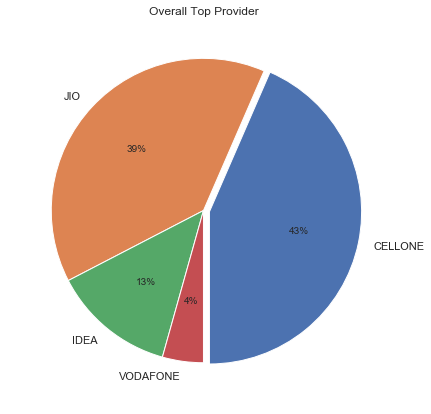

In [81]:
occurrence_count = {}

for provider in top_providers.values():
    if provider in occurrence_count:
        occurrence_count[provider] += 1
    else:
        occurrence_count[provider] = 1

occurrence_count = dict(sorted(occurrence_count.items(), key=operator.itemgetter(1), reverse=True))
        
occurrences = list(occurrence_count.values())
provider_list = list(occurrence_count.keys())

explode = []
for i in range(len(occurrences)):
    explode.append(0)
explode[0] = 0.04

explode = tuple(explode)

plt.figure(figsize=(7, 7))
plt.pie(occurrences, labels=provider_list, startangle=270,
        explode=explode, autopct='%1.0f%%')
plt.title("Overall Top Provider")
plt.savefig('../plots/Best Providers Pie Chart.png')
plt.show()

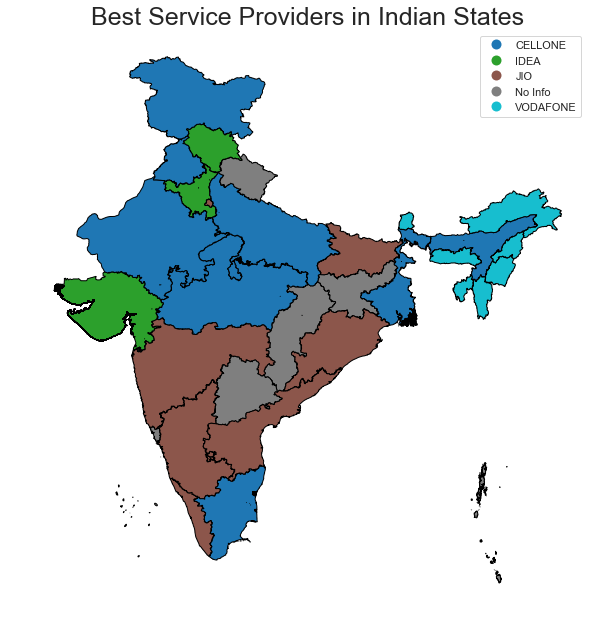

In [82]:
'''
In Anaconda shell (if using Jupyter Notebook):
conda install geopandas
conda install descartes

In Command line (if running in normal python ide):
pip install geopandas
pip install descartes
'''
import geopandas as gpd

fp = "../data/Indian_States.shp"
map_df = gpd.read_file(fp)
map_df.at[23, 'st_nm'] = 'Delhi'
map_df.at[34, 'st_nm'] = 'Orissa'
north_eastern_states = ['Arunanchal Pradesh', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Sikkim', 'Tripura']

all_states_providers = {}

for state in map_df['st_nm']:
    if state in north_eastern_states:
        all_states_providers[state] = top_providers['North East']
    elif state == 'Uttar Pradesh':
        all_states_providers[state] = top_providers['UP East']
    elif state in top_providers.keys():
        all_states_providers[state] = top_providers[state]
    else:
        all_states_providers[state] = 'No Info'

map_df['top_providers'] = list(all_states_providers.values())
map_df.head()

fig, ax = plt.subplots(1, figsize=(10, 15))
ax.axis('off')
ax.set_title('Best Service Providers in Indian States', fontdict={'fontsize': '25'})

map_df.plot(column='top_providers', ax=ax, legend=True, edgecolor='black')
plt.savefig('../plots/Best Providers Over India.png')